In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
import numpy

In [2]:
housing = pd.read_csv('Housing.csv')

In [3]:
housing.head()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT10,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.rename(columns={'PTRAT10': 'PTRATIO'}, inplace=True)


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIME    506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<AxesSubplot:title={'center':'CRIME'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

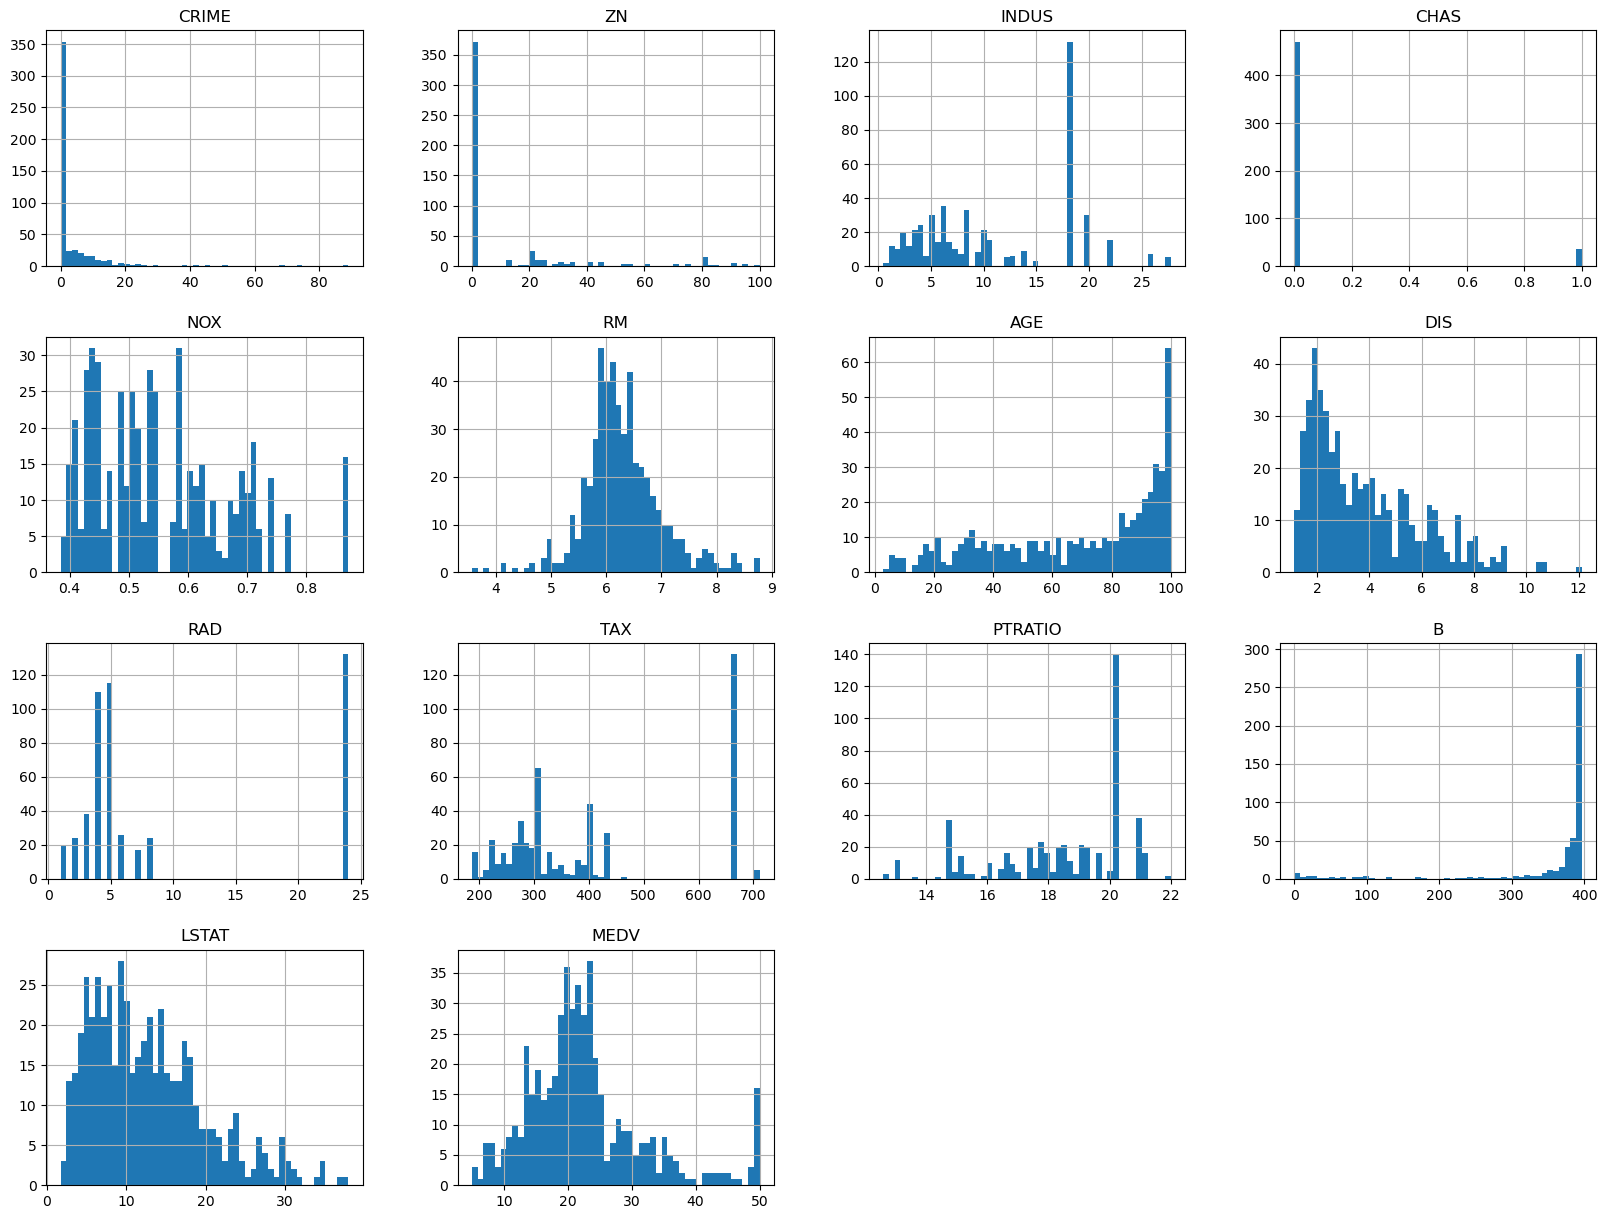

In [6]:
housing.hist(bins =50 , figsize = (20,15))

In [7]:
housing['LSTAT'].skew()

0.9064600935915367

## Adding new attributes

In [8]:
housing.head()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Train test split

In [9]:
from sklearn.model_selection import train_test_split 
train_set , test_set = train_test_split(housing, test_size=0.2 , random_state=42)




In [10]:
print(f"rows in training set :{len(train_set)} \n rows in testing set:{len(test_set)}")

rows in training set :404 
 rows in testing set:102


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)
for train_index , test_index in split.split(housing , housing['CHAS']):
    stratified_train_set = housing.loc[train_index]
    stratified_test_set = housing.loc[test_index]
    

In [12]:
stratified_train_set['CHAS'].value_counts() , stratified_test_set['CHAS'].value_counts()

(0    376
 1     28
 Name: CHAS, dtype: int64,
 0    95
 1     7
 Name: CHAS, dtype: int64)

In [13]:
housing['TPR'] = housing['TAX']/housing['RM']

In [14]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIME     -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TPR       -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [15]:
housing = stratified_train_set.copy()

# Extracting dependents and independents variables

In [16]:
housing = stratified_train_set.drop("MEDV", axis =1)
housing_labels = stratified_train_set["MEDV"]
housing.shape

(404, 13)

In [17]:
housing.head()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


## LOOKING FOR CORRELATION

# creating a pipeline

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([("imputer",SimpleImputer(strategy = "median")),
                        ("std_scaler", StandardScaler())
                       ]
)

In [19]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [20]:
housing_num_tr.shape

(404, 13)

## Linear Regressor model 

In [149]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr , housing_labels )

LinearRegression()

#  Evaluation metrics

## using cross validation metric

In [150]:
from sklearn.model_selection  import cross_val_score
scores = cross_val_score(model ,housing_num_tr , housing_labels , scoring = "neg_mean_squared_error" , cv = 10)
rmse_lin = np.sqrt(-scores)


In [151]:
def print_scores(scores):
    print("scores",scores)
    print("mean", scores.mean())
    print("std", scores.std())

In [152]:
print_scores(rmse_lin)

scores [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
mean 5.030437102767305
std 1.0607661158294834


# DECISION TREE MODEL

In [115]:
## DECISION TREE MODEL


from sklearn.tree import DecisionTreeRegressor
model_1 = DecisionTreeRegressor()
model_1.fit(housing_num_tr , housing_labels )

DecisionTreeRegressor()

# Evaluating model with cv 

In [108]:
from sklearn.model_selection  import cross_val_score
scores = cross_val_score(model_1 ,housing_num_tr , housing_labels , scoring = "neg_mean_squared_error" , cv = 10)
rmse_DT = np.sqrt(-scores)


In [123]:
# printing scores
print_scores(rmse_DT)

scores [3.71092652 5.29581059 5.51753303 3.95156653 3.93141196 3.28918683
 5.33469774 3.70826779 3.42425174 4.06915225]
mean 4.223280497267179
std 0.7926003129174458


# RandomForest Classifer model

In [137]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(housing_num_tr , housing_labels )

RandomForestRegressor()

## Evaluating model with cv

In [138]:
from sklearn.model_selection  import cross_val_score
scores = cross_val_score(model_2 ,housing_num_tr , housing_labels , scoring = "neg_mean_squared_error" , cv = 10)
rmse_RR = np.sqrt(-scores)

# printing scores

In [139]:
print_scores(rmse_RR)

scores [2.87047897 2.921367   4.23312407 2.63398761 3.15935404 2.5015619
 4.54179277 3.32181285 3.08910781 2.95693785]
mean 3.222952487619744
std 0.6280730853925189


# Testing model on test (unseen data)

In [165]:
x_test = stratified_test_set.drop("MEDV", axis =1)
y_test = stratified_test_set["MEDV"]
x_prepared = my_pipeline.transform(x_test)
x_predictions = model_2.predict(x_prepared)
final_mse= mse(y_test ,x_predictions )
final_rmse = np.sqrt(final_mse)
(final_rmse)

3.0095289172761843